# DBSCAN (Density-Based Spatial Clustering of Application with Noise)

- 밀도(데이터포인트의 간격) 기반 군집 알고리즘

![](https://d.pr/i/Re9qoB+)

![](https://d.pr/i/T3srVy+)

![](https://d.pr/i/tiIr6K+)

**장점**
- 비구형 클러스터 탐지
- 노이즈 데이터 처리
- 비지도 학습 (클러스터 개수를 사전에 알 필요가 없음)

**단점**
- 데이터 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능 저하
- 특성 개수가 많으면 군집화 성능 저하 (고차원 데이터에서의 밀도 불균형)
- 매개변수 민감성

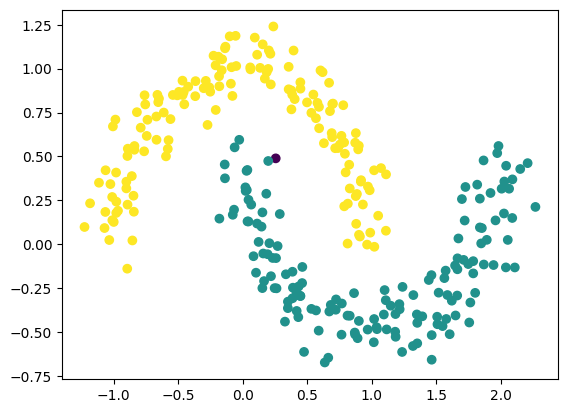

In [10]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=6) # eps(이웃 점의 거리 반지름, 0.5)
                                        # min_samples(minPts, 5)
dbscan.fit(X)   # 클러스터링 계산

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

In [11]:
import numpy as np

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([  1, 149, 150]))

### iris 데이터셋에 DBSCAN 적용

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

In [13]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.3, min_samples=4)
dbscan.fit_predict(iris_data.data)      # dbscan은 transform, predict가 없음

iris_df['cluster'] = dbscan.labels_
iris_df.groupby('species')['cluster'].value_counts()

species  cluster
0         0         38
         -1         12
1        -1         28
          2         13
          1          4
          3          4
          5          1
2        -1         41
          5          5
          4          4
Name: count, dtype: int64

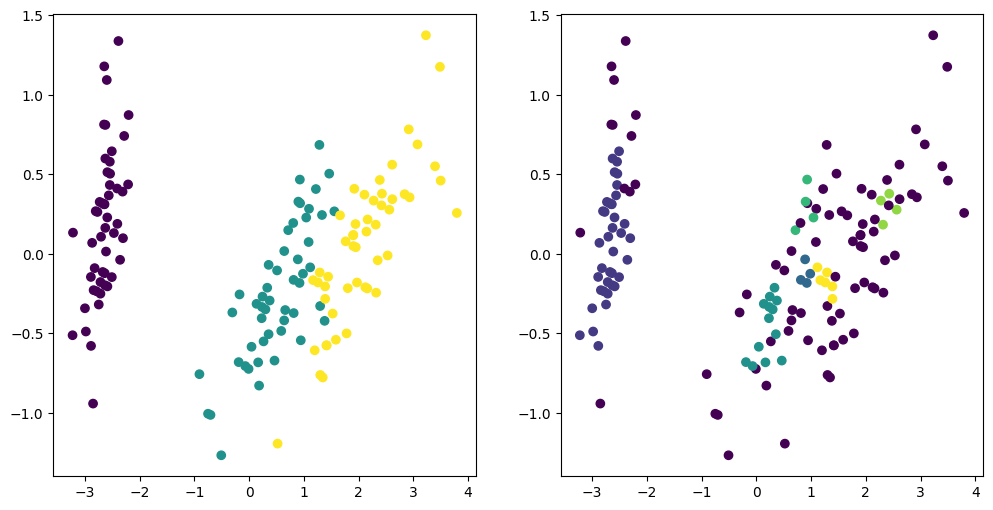

In [ ]:
from sklearn.decomposition import PCA

# 시각화를 위한 PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_data.data)
iris_df['pca1'] = pca_transformed[:, 0]
iris_df['pca2'] = pca_transformed[:, 1]

# species(라벨 데이터) 기준 시각화 + cluster(dbscan 군집 데이터) 기준 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['species'])
ax[1].scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.show()